## Notes from statistics
### Graphs to choose from when working with different frequency distribution tables:

Dataset I'm going to use is about The Women's National Basketball Association.


(c) Miradiz Rakhmatov

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
wnba = pd.read_csv('wnba.csv')

In [3]:
wnba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          143 non-null    object 
 1   Team          143 non-null    object 
 2   Pos           143 non-null    object 
 3   Height        143 non-null    int64  
 4   Weight        142 non-null    float64
 5   BMI           142 non-null    float64
 6   Birth_Place   143 non-null    object 
 7   Birthdate     143 non-null    object 
 8   Age           143 non-null    int64  
 9   College       143 non-null    object 
 10  Experience    143 non-null    object 
 11  Games Played  143 non-null    int64  
 12  MIN           143 non-null    int64  
 13  FGM           143 non-null    int64  
 14  FGA           143 non-null    int64  
 15  FG%           143 non-null    float64
 16  15:00         143 non-null    int64  
 17  3PA           143 non-null    int64  
 18  3P%           143 non-null    

In [4]:
wnba.head()

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,...,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
0,Aerial Powers,DAL,F,183,71.0,21.200991,US,"January 17, 1994",23,Michigan State,...,6,22,28,12,3,6,12,93,0,0
1,Alana Beard,LA,G/F,185,73.0,21.329438,US,"May 14, 1982",35,Duke,...,19,82,101,72,63,13,40,217,0,0
2,Alex Bentley,CON,G,170,69.0,23.875433,US,"October 27, 1990",26,Penn State,...,4,36,40,78,22,3,24,218,0,0
3,Alex Montgomery,SAN,G/F,185,84.0,24.543462,US,"December 11, 1988",28,Georgia Tech,...,35,134,169,65,20,10,38,188,2,0
4,Alexis Jones,MIN,G,175,78.0,25.469388,US,"August 5, 1994",23,Baylor,...,3,9,12,12,7,0,14,50,0,0


In [5]:
wnba.Experience.value_counts(dropna=False).sort_index()

1     12
10     5
11     4
12     4
13     3
14     3
15     2
2     11
3     19
4     11
5     14
6     14
7      4
8      3
9     11
R     23
Name: Experience, dtype: int64

In [6]:
## Converting Experience column into int
## "R" stands for rookie which is 0 years experience
wnba['Experience'] = wnba['Experience'].map(lambda x: 0 if x == "R" else int(x))

## Creating ordinal values for each measurable year in Experience column 
def categorize(x):
    if x  == 0:
        return 'Rookie'
    elif x >= 1 and x <= 3:
        return 'Little experience'
    elif x >= 4 and x <= 5:
        return 'Experienced'
    elif x >= 6 and x <= 10:
        return 'Very experienced'
    elif x > 10:
        return 'Veteran'
wnba['Exp_ordinal'] = wnba['Experience'].map(categorize)
wnba['Exp_ordinal'].value_counts()

Little experience    42
Very experienced     37
Experienced          25
Rookie               23
Veteran              16
Name: Exp_ordinal, dtype: int64

## 1. Number of player in each position by experience level:
* Segment the players in the data set by level of experience.
* For each segment, generate a frequency distribution table for the Pos variable.
* Analyze the frequency distributions comparatively.


In [7]:
## Isolating data by Experience in ordinal scale of measurement 
rookies = wnba[wnba['Exp_ordinal'] == 'Rookie']
little_xp = wnba[wnba['Exp_ordinal'] == 'Little experience']
experienced = wnba[wnba['Exp_ordinal'] == 'Experienced']
very_xp = wnba[wnba['Exp_ordinal'] == 'Very experienced']
veterans =  wnba[wnba['Exp_ordinal'] == 'Veteran']

## Creating frequency distribution table of positions for each category in Exp_ordinal column 
rookie_distro = rookies['Pos'].value_counts()
little_xp_distro = little_xp['Pos'].value_counts()
experienced_distro = experienced['Pos'].value_counts()
very_xp_distro = very_xp['Pos'].value_counts()
veteran_distro = veterans['Pos'].value_counts()

In [8]:
rookie_distro

G      14
C       4
F       4
F/C     1
Name: Pos, dtype: int64

In [9]:
little_xp_distro

G      14
F      13
C       8
F/C     4
G/F     3
Name: Pos, dtype: int64

In [10]:
experienced_distro

G      9
C      6
F      6
G/F    2
F/C    2
Name: Pos, dtype: int64

## A better way:
If we plot a bar for each of the frequency distribution tables above, it would be hard to compare them side by side. However, we can use seaborn's countplot() to plot each table side by side in one big figure. This saves us a lot of time from segmenting data like we did above. 

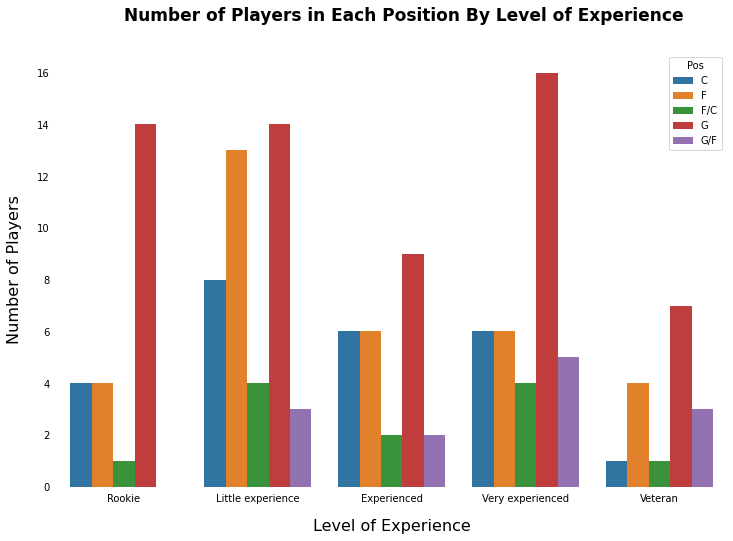

In [11]:
fig, ax = plt.subplots(figsize=(12,8))
sns.countplot(x = 'Exp_ordinal', hue = 'Pos', data = wnba,
              order = ['Rookie', 'Little experience', 'Experienced', 'Very experienced', 'Veteran'],
              hue_order = ['C', 'F', 'F/C', 'G', 'G/F'])
for location in ['left', 'right', 'top', 'bottom']:
     ax.spines[location].set_visible(False)                             
ax.set_xlabel('Level of Experience', labelpad=15, size=16)
ax.set_ylabel('Number of Players', labelpad=15, size=16)
ax.tick_params(bottom=False, left=False)
ax.text(x=0, y=18, s='Number of Players in Each Position By Level of Experience', size=17, weight='bold')
plt.show()

## 2. Hypothesis:
When players get past a certain age, they become less and less physically fit as they get older. Intuitively, the fitness level of a player should directly affect how much she plays in a season. On average, a WNBA player played approximately 497 minutes in the 2016-2017 season. Let's hypothesize that older players generally play less than this average of 497 minutes, while younger players generally play more. As a benchmark to distinguish between younger and older players, we'll take the mean age of players in our sample, which is approximately 27: 
* << wnba['Age'].mean())
*  27.076923076923077

* << wnba['MIN'].mean()
* 496.97202797202794


1. Create a column with ordinal values for age: 
* Young 
* Old

2. Create a column with ordinal values for minutes played:
* Avarage or above
* Below avarage

In [12]:
wnba['age_mean_relative'] = wnba['Age'].apply(lambda x: 'old' if x >= 27 else 'young')
wnba['min_mean_relative'] = wnba['MIN'].apply(lambda x: 'average or above' if x >= 497 else 'below average')

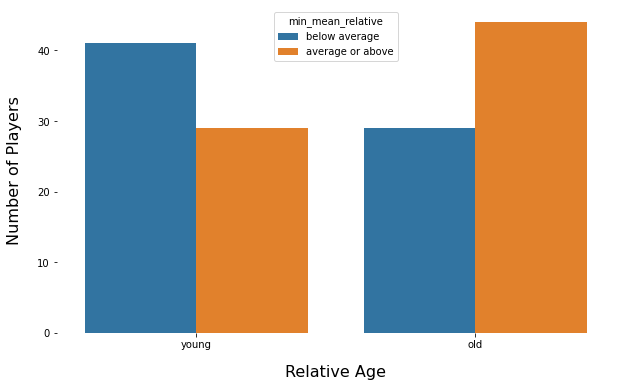

In [13]:
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(x = 'age_mean_relative', hue='min_mean_relative', data=wnba)
for location in ['left', 'right', 'top', 'bottom']:
     ax.spines[location].set_visible(False)   
ax.set_xlabel('Relative Age', labelpad=15, size=16)
ax.set_ylabel('Number of Players', labelpad=15, size=16)
plt.show()

### We can also use kernel density estimate (KDE) plot to get more specific

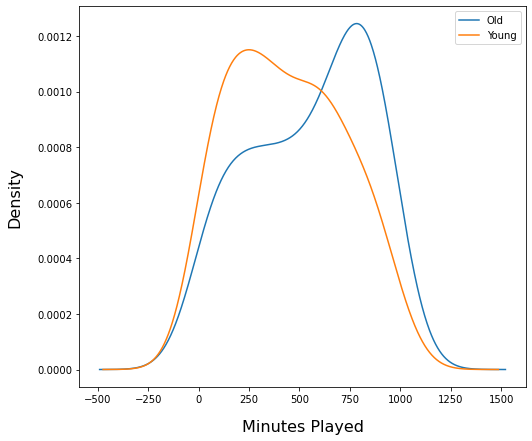

In [14]:
wnba.loc[wnba.Age >= 27, 'MIN'].plot.kde(label = 'Old', legend=True, figsize=(8,7))
wnba.loc[wnba.Age < 27, 'MIN'].plot.kde(label = 'Young', legend=True)
plt.xlabel('Minutes Played', labelpad=15, size=16)
plt.ylabel('Density', labelpad=15, size=16)
plt.show()

### Findings:
Our hyposesis was rejected because relatively older player spend more minutes on the field per season than young player. 

## Distribution of height and weight by position on the field:

Let's look at how height and weight are distributed throughout different positions on the field.

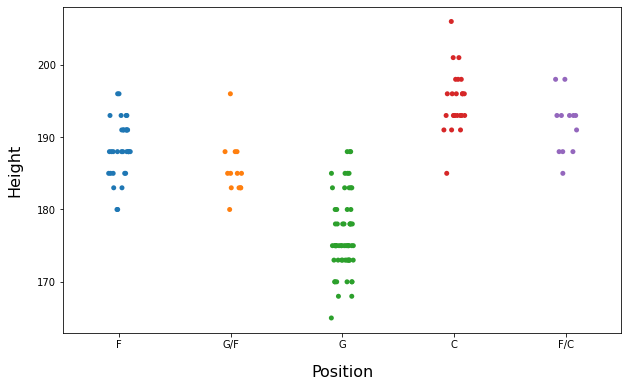

In [15]:
fig, ax = plt.subplots(figsize=(10,6))
sns.stripplot(x = 'Pos', y = 'Height', data = wnba, jitter = True)
ax.set_xlabel('Position', labelpad=15, size=16)
ax.set_ylabel('Height', labelpad=15, size=16)
plt.show()

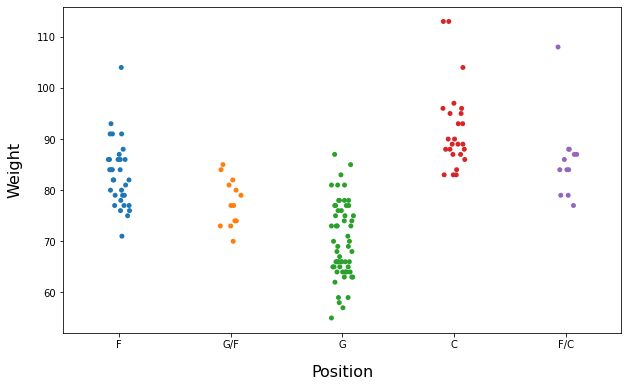

In [16]:
fig, ax = plt.subplots(figsize=(10,6))
sns.stripplot(x = 'Pos', y = 'Weight', data = wnba, jitter = True)
ax.set_xlabel('Position', labelpad=15, size=16)
ax.set_ylabel('Weight', labelpad=15, size=16)
plt.show()

### Findings:

As it is shown above, players on guard positions tend to be of relatively smaller complexity whereas those on the center are of bigger complexity.

### Another way to get more details about this information:

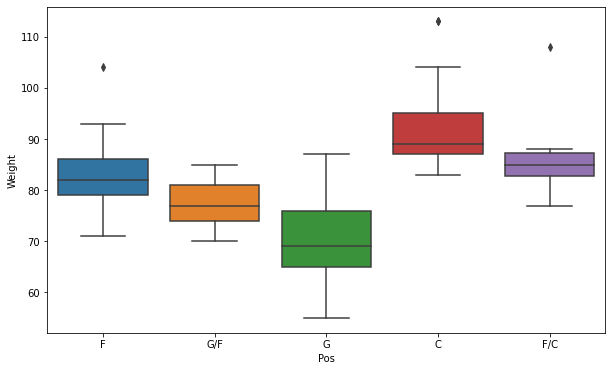

In [17]:
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(x='Pos', y='Weight', data=wnba)
plt.show()

#### Let's understand what this graph means:
In a nutshell, the graph on the left shows the range of the distribution and its three quartiles (the 25th, the 50th and the 75th percentile). This allows us to get a good visual intuition about the proportion of values that fall under a certain quartile, between any two quartiles, or between a quartile and the minimum or the maximum value in the distribution:

![](quartiles.svg)

The few dots we see for the box plots represent values in the distribution that are much larger or much lower than the rest of the values. A value that is much lower or much larger than the rest of the values in a distribution is called an outlier.

#### A value is an outlier if:

* It's larger than the upper quartile by 1.5 times the difference between the upper quartile and the lower quartile (the difference is also called the interquartile range).
* It's lower than the lower quartile by 1.5 times the difference between the upper quartile and the lower quartile (the difference is also called the interquartile range).

From the output of wnba[wnba['Pos'] == 'C']['Height'].describe(), we can see that the upper quartile (the 75th percentile) is 196 and the lower quartile (the 25th percentile) is 193. Hence, the interquartile range is 3. 


Interquartile range = upper quartile - lower quartile


Every value that is IQR*1.5 bigger than upper quartile is considered an outliner.


Ever value that is IQR*1.5 lower than lower quartile is considered an outliner.

In [18]:
wnba['Games Played'].describe()

count    143.000000
mean      24.356643
std        7.104259
min        2.000000
25%       22.000000
50%       27.000000
75%       29.000000
max       32.000000
Name: Games Played, dtype: float64

In [19]:
## Outliners for a given column
def outliners(column):
    sns.boxplot(x=column, data=wnba)
    plt.show()
  
    upper_q = wnba[column].describe()['75%']
    lower_q = wnba[column].describe()['25%']

    iqr = upper_q - lower_q

    upper_bound = upper_q + iqr*1.5
    lower_bound = lower_q - iqr*1.5
    
    outliers_high = 0
    for value in wnba[column]:
        if value > upper_bound:
            outliers_high += 1
    
    outliers_low = 0
    for value in wnba[column]:
        if value < lower_bound:
            outliers_low += 1
    print("High outliners: {}".format(outliers_high), "Low outliners: {}".format(outliers_low))


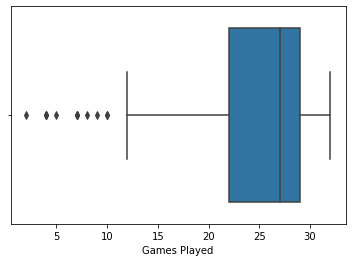

High outliners: 0 Low outliners: 12


In [20]:
outliners('Games Played')

## The End